# Kelvin-Helmholtz Growth Rate Analysis

### Williams + Young vs Keppens perturbation

### Autoselection of Linear Regime

## Williams + Youngs Perturbation

<img src="pres4517/yws.PNG">

## W+Y Evolution Morphology
<img src="pres4517/visit0005.PNG">

In [13]:
import matplotlib.pyplot as plt
import glob
import csv
%matplotlib inline
fig_size = [9,9]
plt.rcParams["figure.figsize"] = fig_size


In [3]:
import numpy as np 
from scipy.optimize import curve_fit

aRange = np.linspace(0.1, 0.9, 10)
mRange = np.linspace(0.1, 1.2, 10)

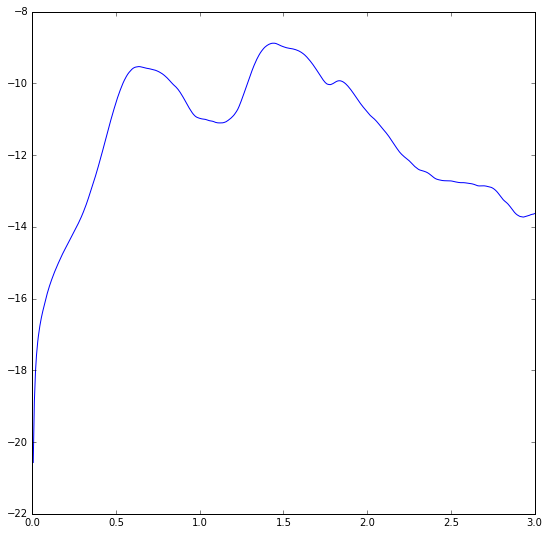

In [85]:
phasespace = np.zeros([10])
#for i, Atwood in enumerate(aRange):
#for j, Mach in enumerate(mRange):
Mach = mRange[4]
Atwood = aRange[0]
dirName = "KHIMa=%(Ma)5.3fAt=%(At)5.3f" % {"Ma":Mach, "At":Atwood}
#dirName = 'Kippens'
avpstr = './'+dirName + '/*.avp'
avplist = glob.glob(avpstr)
time = np.array([])
ymom = np.array([])
for curravp in avplist: 
    result = np.loadtxt(curravp,skiprows=1, usecols=[0,2,3,4])
    time = np.append(time, result[0,0])
    ymomem = sum(abs(result[:,3]))
    tmomen = sum(abs(result[:,2])) + sum(abs(result[:,3]))
    dens = sum(abs(result[:,1]))
    ymom = np.append(ymom, (ymomem**2/dens) / (tmomen**2 /dens))
grad = (np.gradient(ymom[40:np.size(ymom)]))
zero_crossings = np.where(grad< 0)[0]
ind = zero_crossings[0]
#.plot(time[0:10], ymom[0:10])
#plt.plot(time[1:np.size(time)], np.log(ymom[1:np.size(time)]))
#plt.plot(time[1], np.log(ymom[1:ind]))
popt, pcov = curve_fit(KHexp, time[10:ind], ymom[10:ind], maxfev = 3000)
#phasespace[i] = popt[1]

## William + Young Energy Growth



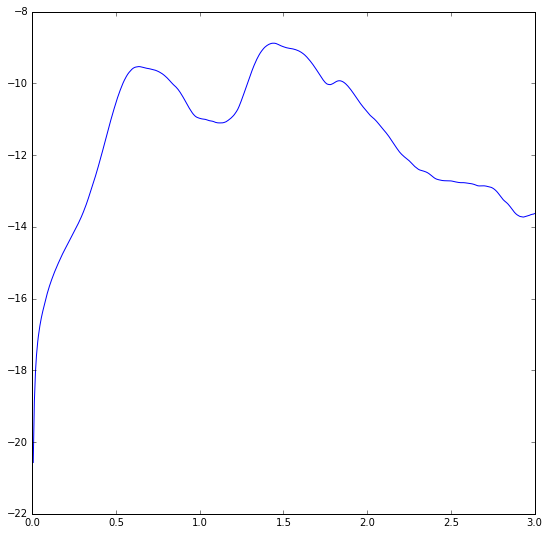

In [86]:
plt.plot(time[1:np.size(time)], np.log(ymom[1:np.size(time)]))


In [89]:
phasespace = np.zeros([10])
#for i, Atwood in enumerate(aRange):
#for j, Mach in enumerate(mRange):
Mach = mRange[0]
#dirName = "KHIMa=%(Ma)5.3fAt=%(At)5.3f" % {"Ma":Mach, "At":Atwood}
dirName = 'Kippens'
avpstr = './'+dirName + '/*.avp'
avplist = glob.glob(avpstr)
time = np.array([])
ymom = np.array([])
for curravp in avplist: 
    result = np.loadtxt(curravp,skiprows=1, usecols=[0,2,3,4])
    time = np.append(time, result[0,0])
    ymomem = sum(abs(result[:,3]))
    tmomen = 1.e0 #sum(abs(result[:,2])) + sum(abs(result[:,3]))
    dens = sum(abs(result[:,1]))
    ymom = np.append(ymom, (ymomem**2/dens) / (tmomen**2 /dens))
grad = (np.gradient(ymom[40:np.size(ymom)]))
zero_crossings = np.where(grad< 0)[0]
ind = zero_crossings[0]
#.plot(time[0:10], ymom[0:10])
#plt.plot(time[1:np.size(time)], np.log(ymom[1:np.size(time)]))
#plt.plot(time[1:ind], np.log(ymom[1:ind]))
#popt, pcov = curve_fit(KHexp, time[10:ind], ymom[10:ind], maxfev = 3000)
#phasespace[i] = popt[1]


## Keppens et al Perturbation

<img src="pres4517/kippens.PNG">

## Keppens Evolution Morphology
<img src="pres4517/visit0006.PNG">

## Keppens Energy Growth

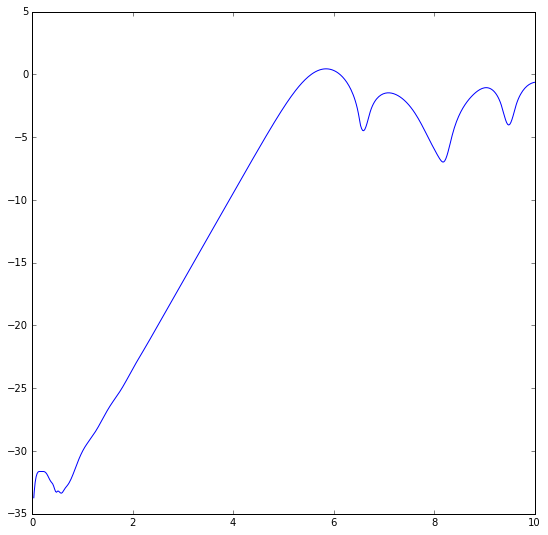

In [59]:
plt.plot(time[1:np.size(time)], np.log(ymom[1:np.size(time)]))


## Auto-Selection of Curve fitting region


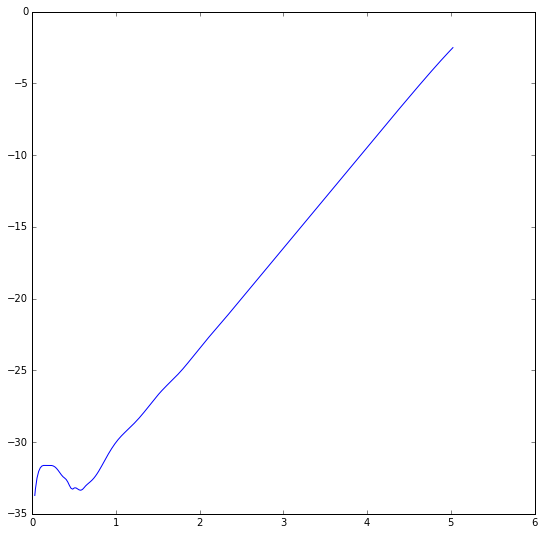

In [90]:
grad = (np.gradient(ymom[40:np.size(ymom)]))
zero_crossings = np.where(grad< 0)[0]
ind = zero_crossings[0]
plt.plot(time[1:ind], np.log(ymom[1:ind]))


## Curve Fitting

3.49443527743


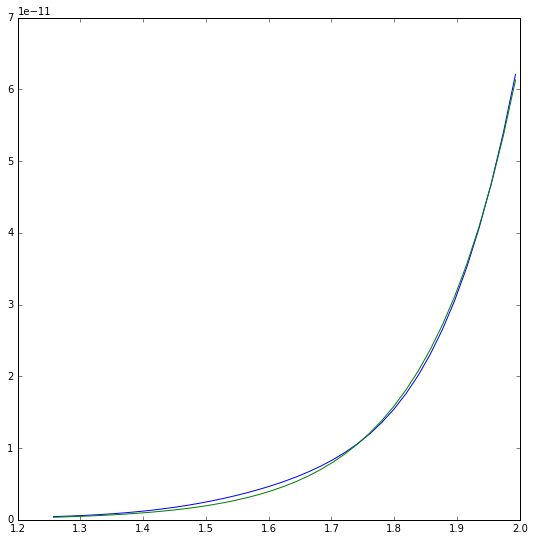

In [91]:
def KHexp(x,a, b):
    return a*np.exp(2*b * x)
tmax = time[ind]
tfS = 0.25 * tmax
tfF = 0.4 * tmax
indS = np.argmin(abs(time-tfS))
indF = np.argmin(abs(time-tfF))
popt, pcov = curve_fit(KHexp, time[indS:indF], ymom[indS:indF],p0 = [1,0.645*0.131], maxfev = 10000)
plt.plot(time[indS:indF], ymom[indS:indF])
plt.plot(time[indS:indF], KHexp(time[indS:indF], popt[0], popt[1]))

print(popt[1])